## Pretrained Alexnet
Deep learning frameworks contain now a set of pretrained models. These models were previously trained on standard dataset such as ImageNet and their weights are downloaded with the model description. 
We can directly use them to classify an image. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torchvision import models
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.autograd import Variable

from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/hadjer/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [5]:
preprocess_image = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
  mean=[0.485, 0.456, 0.406],
  std=[0.229, 0.224, 0.225]
)])


image = Image.open("./images/dog.jpg")
image_tensor = preprocess_image(image)

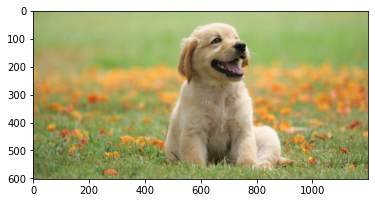

In [13]:
plt.imshow(image)
plt.show()

In [6]:
print(image_tensor.shape)

input_tensor = torch.unsqueeze(image_tensor, 0)
print(input_tensor.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [7]:
alexnet.eval()

prediction_tensor = alexnet(input_tensor)
print(prediction_tensor.shape)

torch.Size([1, 1000])


In [9]:
with open('./imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]


In [10]:
max_value, index_of_max_value = torch.max(prediction_tensor, 1)
print(index_of_max_value.numpy())

predicted_label = labels[index_of_max_value]
print(predicted_label)

[207]
golden retriever
